In [1]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('unemployement-rate-1948-2010.csv')

In [4]:
print(df.head())

     Series id  Year Period  Value
0  LNS14000000  1948    M01    3.4
1  LNS14000000  1948    M02    3.8
2  LNS14000000  1948    M03    4.0
3  LNS14000000  1948    M04    3.9
4  LNS14000000  1948    M05    3.5


In [6]:
!pip install squarify

  Obtaining dependency information for squarify from https://files.pythonhosted.org/packages/0b/2b/2e77c35326efec19819cd1d729540d4d235e6c2a3f37658288a363a67da5/squarify-0.4.3-py3-none-any.whl.metadata


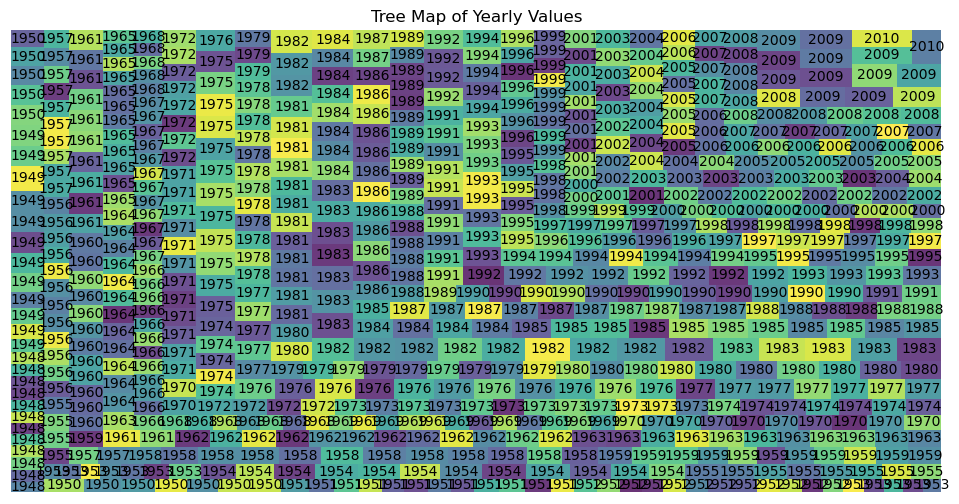

In [8]:
import matplotlib.pyplot as plt
import squarify

# Create a tree map
plt.figure(figsize=(12, 6))
squarify.plot(sizes=df['Value'], label=df['Year'], alpha=0.8)
plt.title('Tree Map of Yearly Values')
plt.axis('off')
plt.show()

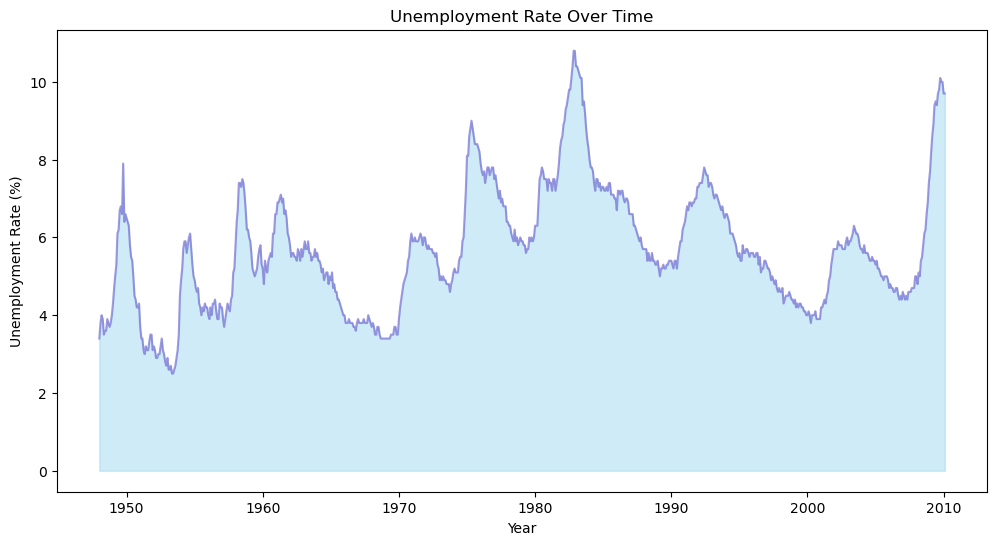

In [9]:
import matplotlib.pyplot as plt

# Convert the 'Year' and 'Period' into a single datetime object
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Period'], format='%Ym%m')

# Plotting the area chart
plt.figure(figsize=(12, 6))
plt.fill_between(df['Date'], df['Value'], color="skyblue", alpha=0.4)
plt.plot(df['Date'], df['Value'], color="Slateblue", alpha=0.6)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()


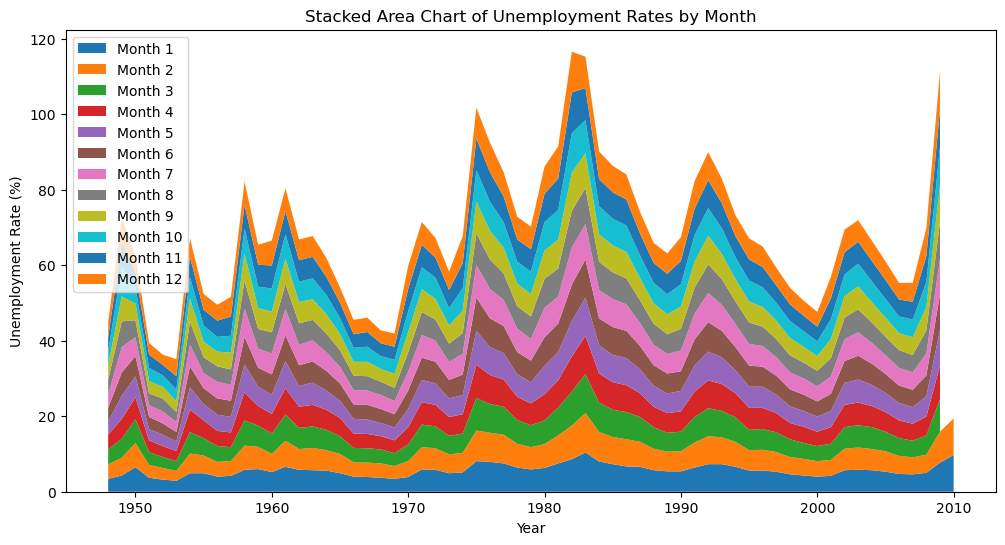

In [10]:
# Convert the Period to represent just the month in numeric form
df['Month'] = df['Period'].str.extract('M(\d+)', expand=False).astype(int)

# Pivot the table so each year has monthly data
pivot_df = df.pivot(index='Year', columns='Month', values='Value')

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.stackplot(pivot_df.index, pivot_df.T, labels=[f'Month {i}' for i in range(1, 13)])
plt.title('Stacked Area Chart of Unemployment Rates by Month')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper left')
plt.show()
